<a href="https://colab.research.google.com/github/Omanshu840/Long-Document-Classification-using-BERT/blob/main/US_Compaints_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import sys
sys.path.append("./drive/MyDrive/ML-Project/RoBERT")

%matplotlib inline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset into a pandas dataframe.
df=pd.read_csv("./drive/MyDrive/ML-Project/RoBERT/us-consumer-finance-complaints/consumer_complaints.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

train_raw = df[df.consumer_complaint_narrative.notnull()]
print('Number of training sentences with complain narrative not null: {:,}\n'.format(train_raw.shape[0]))

# Display 10 random rows from the data.
train_raw.sample(10)

Number of training sentences: 555,957

Number of training sentences with complain narrative not null: 66,806



,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
548345,12/24/2015,Debt collection,I do not know,Disclosure verification of debt,Right to dispute notice not received,My property management placed the judgment for...,Company believes the complaint is the result o...,"Hunter Warfield, Inc.",TX,770XX,NaN,Consent provided,Web,12/24/2015,Closed with explanation,Yes,No,1714307
306801,11/10/2015,Credit card,NaN,Other,NaN,"A Military Star Credit card, aka Take it Home ...",Company believes it acted appropriately as aut...,Army and Air Force Exchange Service,MA,010XX,Servicemember,Consent provided,Web,11/10/2015,Closed with explanation,Yes,Yes,1649718
319578,11/30/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I applied for loan modification in 2010 which ...,NaN,Ocwen,CT,061XX,NaN,Consent provided,Web,11/30/2015,Closed with explanation,Yes,Yes,1674953
272235,08/12/2015,Debt collection,Mortgage,False statements or representation,Attempted to collect wrong amount,When the economy turned bad XX/XX/XXXX and wor...,NaN,Residential Credit Solutions,HI,967XX,Servicemember,Consent provided,Web,08/12/2015,Closed with explanation,Yes,No,1514486
226631,05/28/2015,Credit card,NaN,Delinquent account,NaN,Family members have been receiving calls from ...,NaN,"Thomas, King & Associates",AZ,852XX,NaN,Consent provided,Web,06/03/2015,Closed with explanation,Yes,No,1396149
216180,04/22/2015,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,you can not get your statements on line of wha...,NaN,Fifth Third Financial Corporation,KY,411XX,NaN,Consent provided,Web,04/22/2015,Closed with explanation,Yes,No,1341790
531257,02/08/2016,Student loan,Non-federal student loan,Dealing with my lender or servicer,Trouble with how payments are handled,I do not receive statements/bills or any other...,Company believes it acted appropriately as aut...,Sallie Mae,WI,532XX,NaN,Consent provided,Web,02/08/2016,Closed with explanation,Yes,No,1777440
242124,06/09/2015,Debt collection,Credit card,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,These guys from XXXX XXXX keep calling me and ...,NaN,Capital One,TX,774XX,NaN,Consent provided,Web,06/09/2015,Closed with explanation,Yes,No,1412894
278003,09/08/2015,Credit reporting,NaN,Incorrect information on credit report,Public record,Statutes of Limitations for the Bankruptcy rec...,NaN,Equifax,GA,302XX,NaN,Consent provided,Web,09/09/2015,Closed with explanation,Yes,No,1554760
540210,01/30/2016,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,"I co-signed on this vehicle, this case went to...",NaN,Ford Motor Credit Company,FL,331XX,NaN,Consent provided,Web,01/30/2016,Closed with explanation,Yes,No,1764945


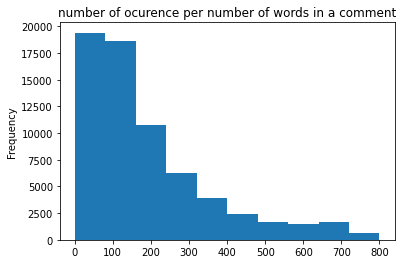

In [5]:
train_raw.consumer_complaint_narrative.apply(lambda x: len(x.split()) if len(x.split())<800 else 800).plot(kind='hist', title="number of ocurence per number of words in a comment")

In [6]:
train_raw['len_txt'] =train_raw.consumer_complaint_narrative.apply(lambda x: len(x.split()))
train_raw.describe()

,complaint_id,len_txt
count,6.680600e+04,66806.000000
mean,1.571665e+06,190.644014
std,1.545692e+05,166.830597
min,1.290181e+06,1.000000
25%,1.443264e+06,71.000000
50%,1.569485e+06,136.000000
75%,1.702750e+06,254.000000
max,1.888608e+06,1284.000000


In [7]:
#Select only the row with number of words greater than 250:
train_raw = train_raw[train_raw.len_txt >249]
train_raw.shape

(17142, 19)

In [8]:
#Select only the column 'consumer_complaint_narrative' and 'product'
train_raw = train_raw[['consumer_complaint_narrative', 'product']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,consumer_complaint_narrative,product
0,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
1,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
2,I spoke to XXXX of green tree representatives ...,Mortgage
3,i opened XXXX Bank of America credit cards 15-...,Credit card
4,I applied for a loan with XXXX XXXX and had pu...,Consumer Loan


In [9]:
#Group similar products
train_raw.at[train_raw['product'] == 'Credit reporting', 'product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
train_raw.at[train_raw['product'] == 'Credit card', 'product'] = 'Credit card or prepaid card'
train_raw.at[train_raw['product'] == 'Prepaid card', 'product'] = 'Credit card or prepaid card'
train_raw.at[train_raw['product'] == 'Payday loan', 'product'] = 'Payday loan, title loan, or personal loan'
train_raw.at[train_raw['product'] == 'Virtual currency', 'product'] = 'Money transfer, virtual currency, or money service'
train_raw.head()

,consumer_complaint_narrative,product
0,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
1,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
2,I spoke to XXXX of green tree representatives ...,Mortgage
3,i opened XXXX Bank of America credit cards 15-...,Credit card or prepaid card
4,I applied for a loan with XXXX XXXX and had pu...,Consumer Loan


In [10]:
#all the different classes
for l in np.unique(train_raw['product']):
    print(l)

Bank account or service
Consumer Loan
Credit card or prepaid card
Credit reporting, credit repair services, or other personal consumer reports
Debt collection
Money transfers
Mortgage
Other financial service
Payday loan, title loan, or personal loan
Student loan


In [11]:
train_raw=train_raw.rename(columns = {'consumer_complaint_narrative':'text', 'product':'label'})
train_raw.head()

,text,label
0,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
1,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
2,I spoke to XXXX of green tree representatives ...,Mortgage
3,i opened XXXX Bank of America credit cards 15-...,Credit card or prepaid card
4,I applied for a loan with XXXX XXXX and had pu...,Consumer Loan
